### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Loading the dataset

In [2]:
data = pd.read_csv('Labor_Force_Survey.csv')

### 3. Performing Exploratory Data Analysis (EDA)


We want to understand the shape of our data to know how many features and sample are present.

In [3]:
data.shape

(1000, 55)

Getting the information about the data helps in identifying features and handling  values that are missing.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 55 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Region                                                                    1000 non-null   int64  
 1   Household Unique Sequential Number                                        1000 non-null   int64  
 2   2010Urban-RuralFIES                                                       200 non-null    float64
 3   Final Weight Based on Projection (provincial projections)                 1000 non-null   float64
 4   Survey Month                                                              1000 non-null   int64  
 5   Survey Year                                                               1000 non-null   int64  
 6   Psu Number                                                       

We handle null values by filling it with the mean of columnusing the fillna() method.

In [5]:
data.fillna(data.mode(), inplace=True)

#### Dropping of unnecessary features


We want to drop values that are deemed unnecessary and irrelevant. Removing these values simplifies the dataset.

In [6]:
features_to_remove = ['Region', 'Household Unique Sequential Number', '2010Urban-RuralFIES',
       'Final Weight Based on Projection (provincial projections)',
       'Survey Month', 'Survey Year', 'Psu Number', 'Replicate',
        'C101-Line Number', 'C05-Age as of Last Birthday', 
       'C19-Total Number of Hours Worked during the past week',
       'C20-Want More Hours of Work', 'C21-Look for Additional Work',
       'C24-Basis of Payment (Primary Occupation)',
       'C25-Basic Pay per Day (Primary Occupation)', 'C26-Other Job Indicator',
       'C27-Number of Jobs during the past week',
       'C28-Total Hours Worked for all Jobs',
       'C29-Reasons for Working More than 48 Hours during the past week',
       'C30-Looked for Work or Tried to Establish Business during the past week',
       'C31-First Time to Look for Work',
       'C33-Number of Weeks Spent in Looking for Work',
       'C34-Reason for not Looking for Work', 'C35-When Last Looked for Work',
       'C37-Willingness to take up work during the past week or within two weeks',
       'C38-Previous Job Indicator', 'C40-Previous Occupation',
       'C41-Did work or had a job during the past quarter',
       'C43-Kind of Business (past quarter)',
        'Unnamed: 49', 'Unnamed: 50',
       'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54']

data.drop(features_to_remove, axis=1, inplace=True)
data.head()

Household Size  C03-Relationship to Household Head  C04-Sex  \
0               3                                   3        1   
1              13                                   6        1   
2               4                                   8        2   
3              13                                   5        1   
4               3                                   2        2   

   C06-Marital Status  C07-Highest Grade Completed  \
0                 1.0                      10020.0   
1                 1.0                      10010.0   
2                 3.0                          0.0   
3                 2.0                      10010.0   
4                 2.0                      60413.0   

   C08-Currently Attending School  \
0                             2.0   
1                             1.0   
2                             NaN   
3                             NaN   
4                             NaN   

   C09-Graduate of technical/vocational course  \
0                                          2.0   
1                                          NaN   
2                                          2.0   
3                                          2.0   
4                                          2.0   

   C09a - Currently Attending Non-formal Training for Skills Development  \
0                                                2.0                       
1                                                NaN                       
2                                                2.0                       
3                                                2.0                       
4                                                2.0                       

   C10-Overseas Filipino Indicator  C11-Work Indicator  C12-Job Indicator  \
0                              5.0                 2.0                2.0   
1                              NaN                 2.0                2.0   
2                              5.0                 2.0                2.0   
3                              5.0                 1.0                NaN   
4                              5.0                 1.0                NaN   

   C14-Primary Occupation  C16-Kind of Business (Primary Occupation)  \
0                    61.0                                        1.0   
1                     NaN                                        NaN   
2                     NaN                                        NaN   
3                    93.0                                       41.0   
4                    23.0                                       84.0   

   C17-Nature of Employment (Primary Occupation)  \
0                                            1.0   
1                                            NaN   
2                                            NaN   
3                                            2.0   
4                                            1.0   

   C18-Normal Working Hours per Day  C22-First Time to Work  \
0                               8.0                     2.0   
1                               NaN                     NaN   
2                               NaN                     NaN   
3                               8.0                     2.0   
4                               8.0                     2.0   

   C23-Class of Worker (Primary Occupation)  C32-Job Search Method  \
0                                       1.0                    3.0   
1                                       NaN                    NaN   
2                                       NaN                    NaN   
3                                       1.0                    NaN   
4                                       2.0                    NaN   

   C36-Available for Work  New Employment Criteria (jul 05, 2005)  
0                     1.0                                     3.0  
1                     NaN                                     NaN  
2                     NaN                                     3.0  
3                  

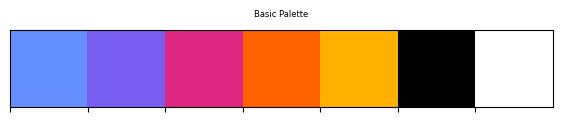

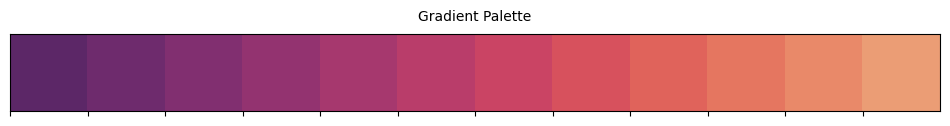

In [7]:
# @title Colors
colors = ["#648FFF", "#785EF0", "#DC267F", "#FE6100", "#FFB000", "#000000", "#FFFFFF"]
colors_grad = sns.color_palette('flare_r',  12)
colors_heat1 = sns.color_palette('flare_r', as_cmap=True)
colors_heat2 = sns.diverging_palette(315, 261, s=74, l=50, center='dark', as_cmap=True)

color_bg = "#1B181C"
color_text = "#FFFFFF"


sns.palplot(colors)
plt.gca().set_title('Basic Palette', fontsize=6, pad=10)

sns.palplot(colors_grad)
plt.gca().set_title('Gradient Palette', fontsize=10, pad=10)

plt.show()

In [8]:
# @title Plot settings
mpl.rcParams['figure.dpi'] = 600
mpl.rcParams["figure.figsize"] = 16,8

# Text
# mpl.rcParams['font.family'] = 'Roboto'

# Title
mpl.rcParams['figure.titlesize'] = 32
mpl.rcParams['axes.titlesize'] = 32
mpl.rcParams['axes.titleweight'] = 'bold'

# Labels
mpl.rcParams['axes.labelsize'] = 22
mpl.rcParams['xtick.labelsize'] = 22
mpl.rcParams['ytick.labelsize'] = 22

# Spacing
mpl.rcParams['axes.titlepad'] = 72
mpl.rcParams['axes.labelpad'] = 10
mpl.rcParams['xtick.major.pad'] = 10
mpl.rcParams['ytick.major.pad'] = 10
mpl.rcParams['xtick.major.width'] = 0
mpl.rcParams['xtick.minor.width'] = 0
mpl.rcParams['ytick.major.width'] = 0
mpl.rcParams['ytick.minor.width'] = 0

# Spines and grids
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.grid'] = False

# Legends
mpl.rcParams['legend.title_fontsize'] = 18
mpl.rcParams['legend.fontsize'] = 18
mpl.rcParams['legend.frameon'] = False

# Bars
plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'

# Colors
mpl.rcParams["figure.facecolor"] = color_bg
mpl.rcParams["axes.facecolor"] = color_bg
mpl.rcParams["savefig.facecolor"] = color_bg

# Text colors
mpl.rcParams['text.color'] = color_text
mpl.rcParams['axes.labelcolor'] = color_text
mpl.rcParams['xtick.color'] = color_text
mpl.rcParams['ytick.color'] = color_text

# Line colorsc
mpl.rcParams['axes.edgecolor'] = color_text

#### Distribution of Male and Female in Workplace



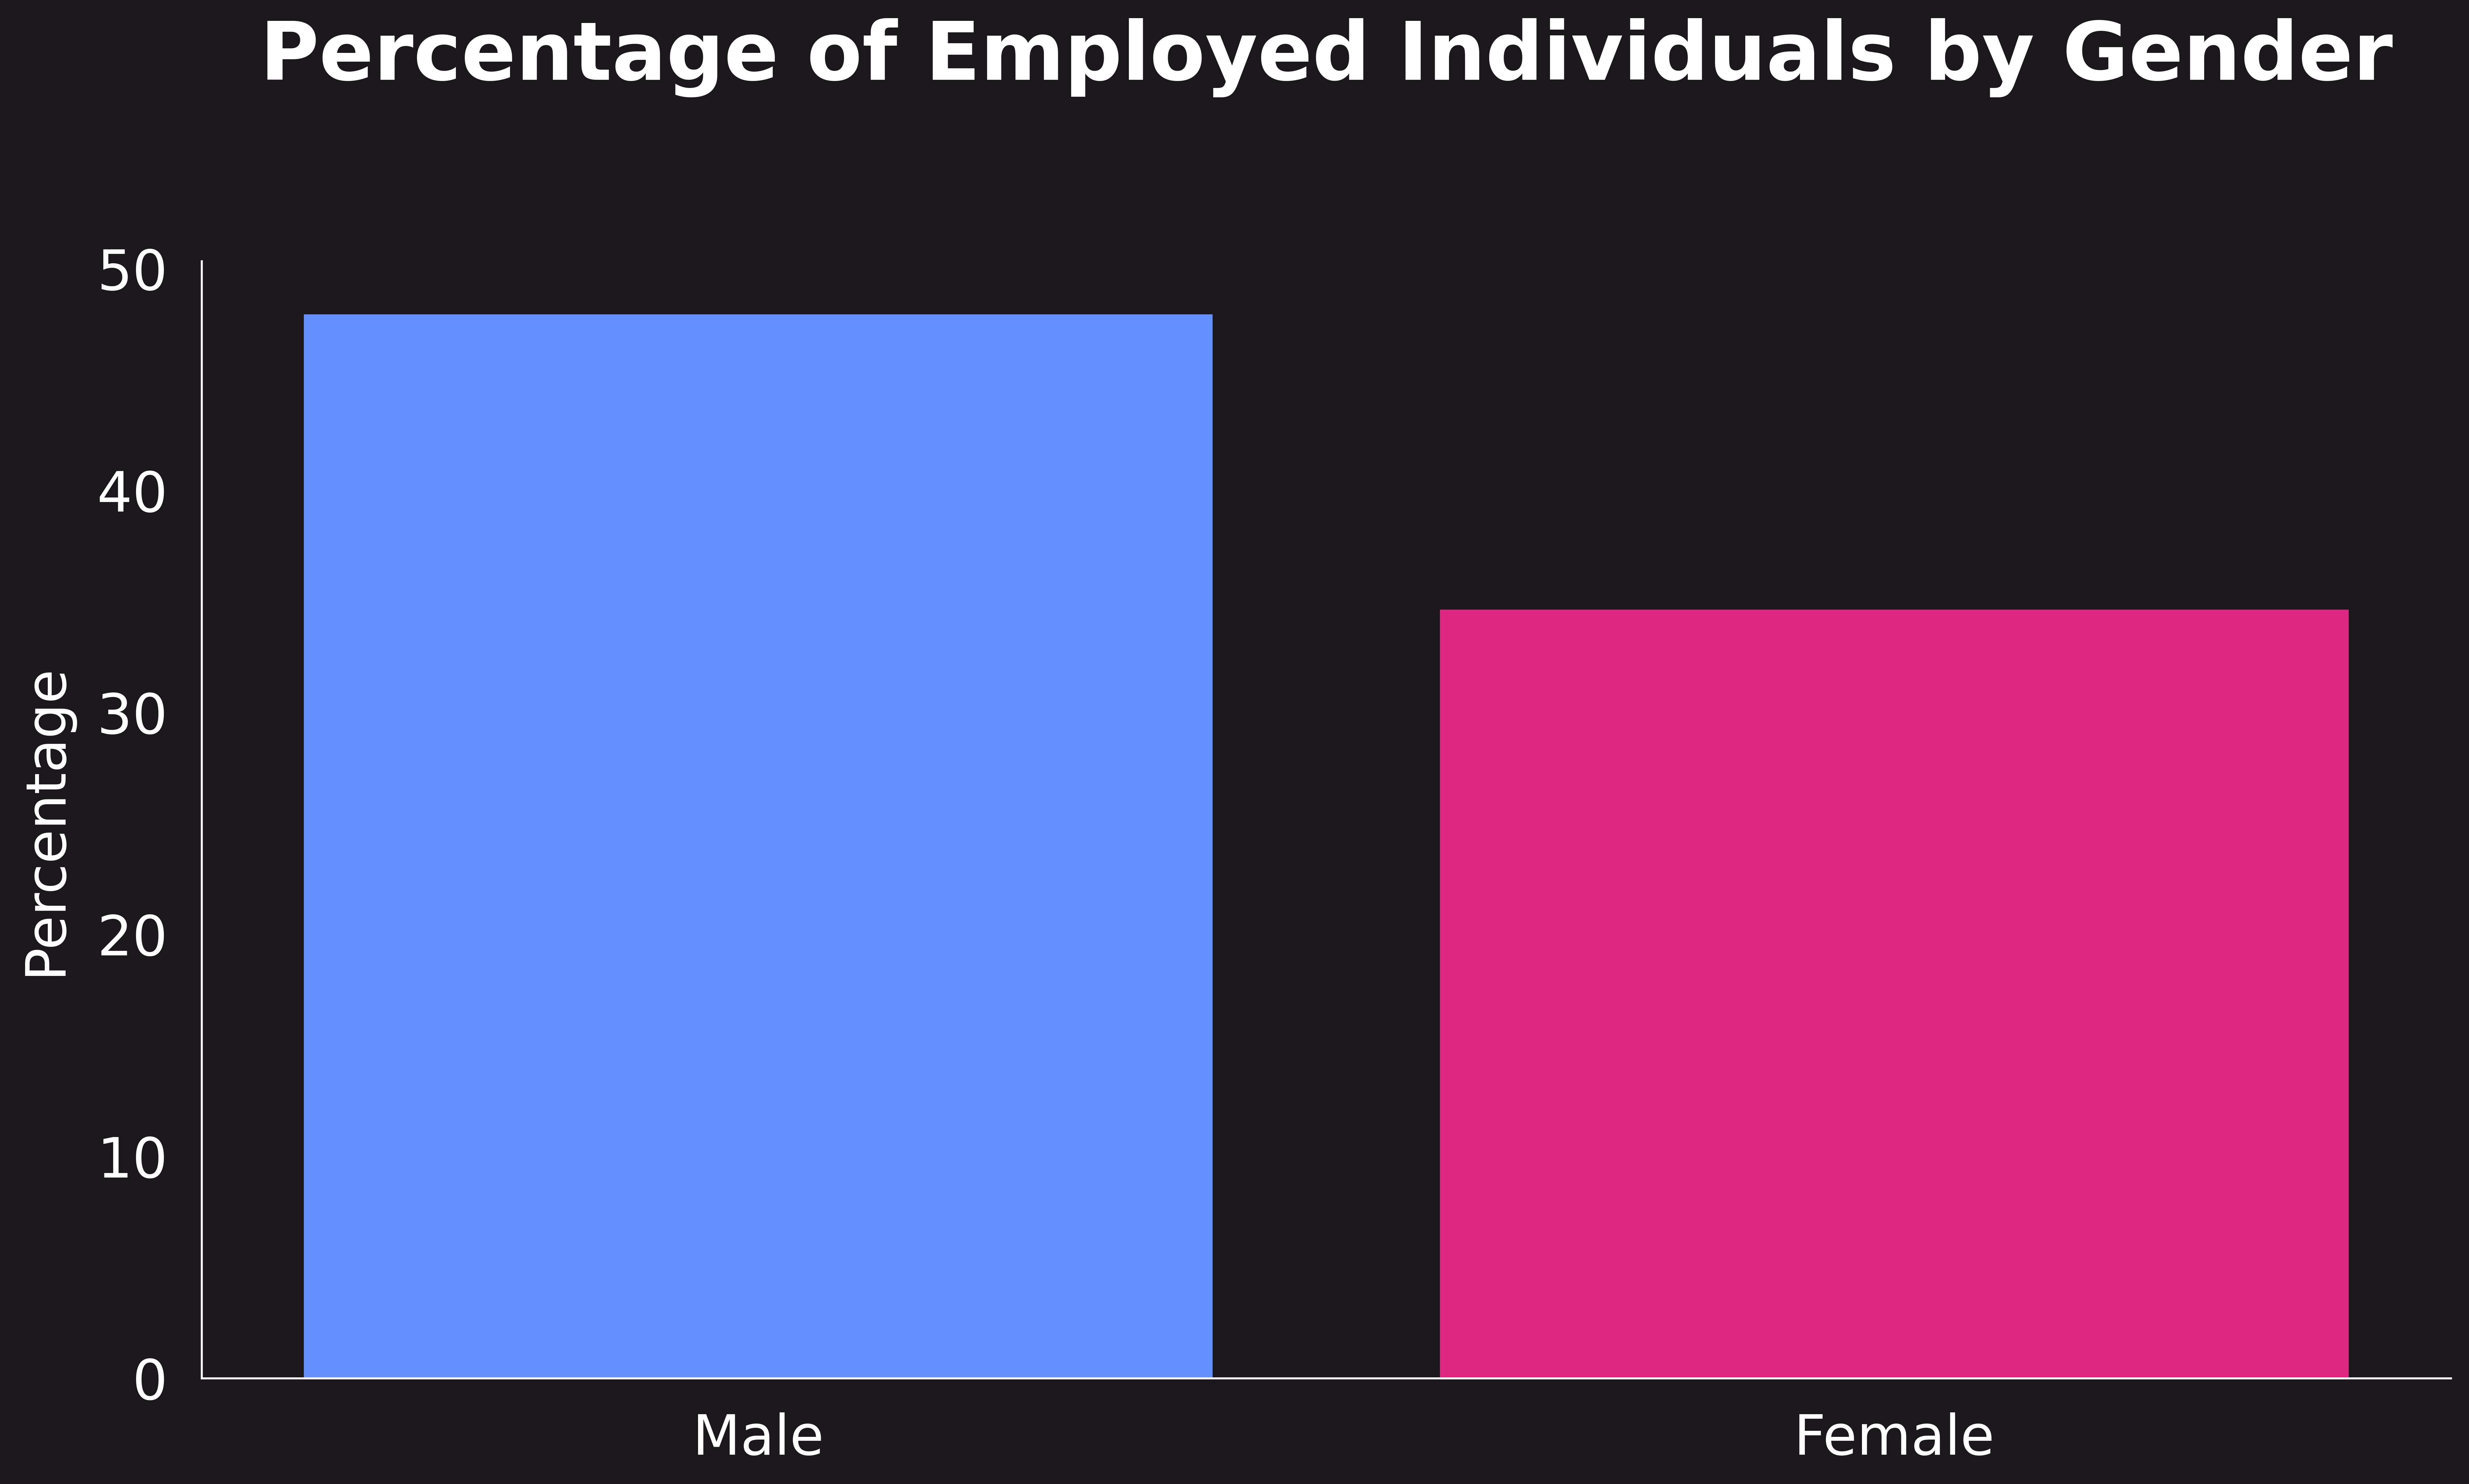

In [9]:

employed_data = data[(data['C10-Overseas Filipino Indicator'] == 1) | (data['C11-Work Indicator'] == 1) | (data['C12-Job Indicator'] == 1) | (data['New Employment Criteria (jul 05, 2005)'] == 1) ]

total_male_count = data[data['C04-Sex'] == 1].shape[0]
total_female_count = data[data['C04-Sex'] == 2].shape[0]

employed_male_percentage = (employed_data[employed_data['C04-Sex'] == 1].shape[0] / total_male_count) * 100
employed_female_percentage = (employed_data[employed_data['C04-Sex'] == 2].shape[0] / total_female_count) * 100

genders = ['Male', 'Female']
percentages = [employed_male_percentage, employed_female_percentage]
colors = ['#648FFF', '#DC267F']

plt.bar(genders, percentages, color=colors)
plt.ylabel('Percentage')
plt.title('Percentage of Employed Individuals by Gender')
plt.show()




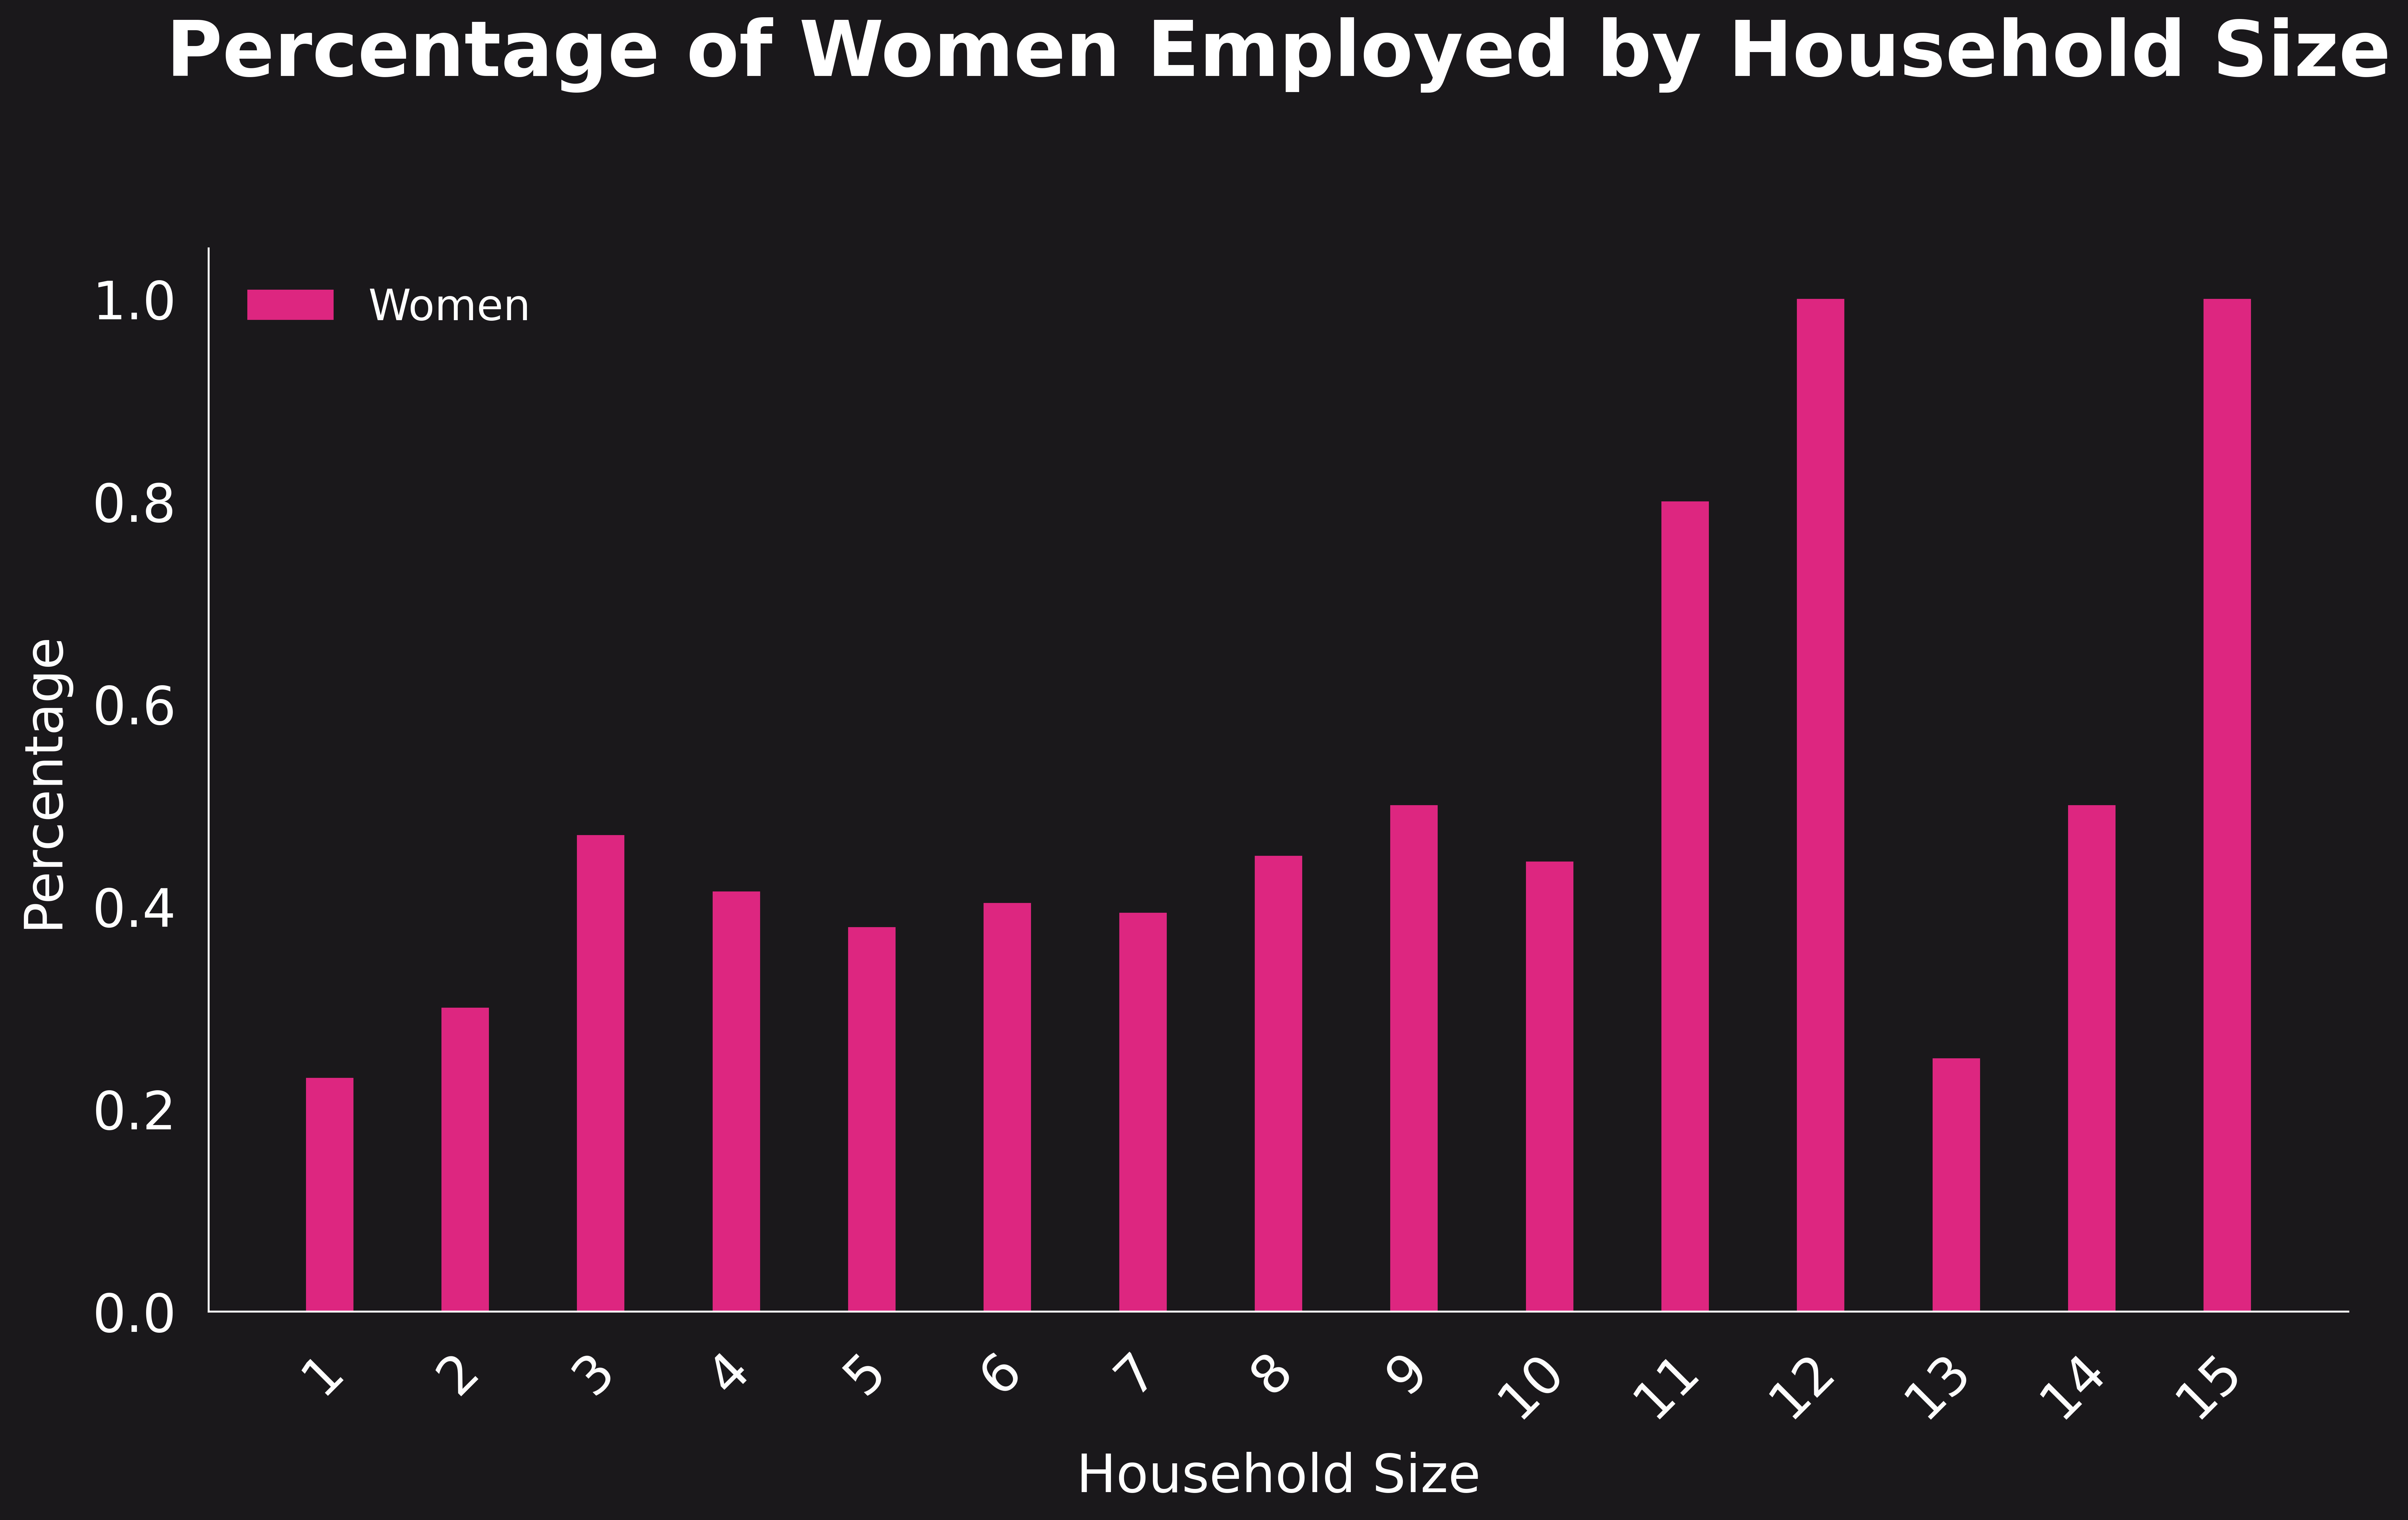

[0.23076923076923078, 0.3, 0.47058823529411764, 0.4148936170212766, 0.379746835443038, 0.40350877192982454, 0.3939393939393939, 0.45, 0.5, 0.4444444444444444, 0.8, 1.0, 0.25, 0.5, 1.0]
C04-Sex          1   2
Household Size        
1               10   3
2               21   9
3               27  24
4               55  39
5               49  30
6               34  23
7               20  13
8               11   9
9                7   7
10               5   4
11               1   4
12               0   2
13               3   1
14               1   1
15               0   1


In [50]:
employed_data = data[(data['C10-Overseas Filipino Indicator'] == 1) | (data['C11-Work Indicator'] == 1) | (data['C12-Job Indicator'] == 1) | (data['New Employment Criteria (jul 05, 2005)'] == 1) ]
employed_data_new = employed_data.pivot_table(index='Household Size', columns='C04-Sex', aggfunc='size', fill_value=0)
data_to_list = employed_data_new.index.tolist()

# Get the counts for men and women
women_counts = (employed_data_new[2] / (employed_data_new[1] + employed_data_new[2])).tolist()

# Define a mapping of original labels to custom labels
label_mapping = {1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 
                 8: '8', 9: '9', 10: '10', 11: '11', 12: '12', 13: '13', 14: '14', 15: '15', 16: '16', 17: '17', 18: '18',
                 19: '19', 20: '20', 21: '21', 22: '22'}

# Map the original labels to custom labels
custom_labels = [label_mapping[dt] for dt in data_to_list]

# Define the width of each bar
bar_width = 0.35

# Set the positions for the bars
r1 = np.arange(len(data_to_list))

# Plot the bar graph
plt.bar(r1, women_counts, color='#DC267F', width=bar_width, label='Women')

# Add labels and title
plt.xlabel('Household Size')
plt.ylabel('Percentage')
plt.title('Percentage of Women Employed by Household Size')
plt.xticks([r + bar_width/2 for r in range(len(data_to_list))], custom_labels, rotation=45, ha='right')
plt.legend()

# Show the plot
plt.show()
print(women_counts)
print(employed_data_new)

In [51]:
employed_data = data[(data['C10-Overseas Filipino Indicator'] == 1) | (data['C11-Work Indicator'] == 1) | (data['C12-Job Indicator'] == 1) | (data['New Employment Criteria (jul 05, 2005)'] == 1) ]
employed_data_new = employed_data.pivot_table(index='C03-Relationship to Household Head', columns='C04-Sex', aggfunc='size', fill_value=0)
data_to_list = employed_data_new.index.tolist()


# Get the counts for men and women
women_counts = (employed_data_new[2] /(employed_data_new[1] + employed_data_new[2])).tolist()

# Define a mapping of original labels to custom labels
label_mapping = {1: 'Head', 2: 'Spouse', 3: 'Son/Daughter', 4: 'Brother/Sister', 5: 'Son/Daughter in Law', 6: 'Grandchildren', 7: 'Father/Mother', 
                 8: 'Other Relative', 9: 'Boarder', 10: 'Domestic Helper', 11: 'Non Relative'}

# Map the original labels to custom labels
custom_labels = [label_mapping[dt] for dt in data_to_list]

# Define the width of each bar
bar_width = 0.35

# Set the positions for the bars
r1 = np.arange(len(data_to_list))

# Plot the bar graph
plt.bar(r1, women_counts, color='#DC267F', width=bar_width, label='Women')

# Add labels and title
plt.xlabel('Relationship to Household Head')
plt.ylabel('Percentage')
plt.title('Percentage of Women Employed by Relationship to Household Head')
plt.xticks([r + bar_width/2 for r in range(len(data_to_list))], custom_labels, rotation=45, ha='right')
plt.legend()

# Show the plot
plt.show()
print(women_counts)
print(employed_data_new)

[0.14285714285714285, 0.8762886597938144, 0.4, 0.5555555555555556, 0.1875, 0.2, 0.0, 0.5, 0.8, 1.0]
C04-Sex                               1   2
C03-Relationship to Household Head         
1                                   138  23
2                                    12  85
3                                    63  42
4                                     4   5
5                                    13   3
6                                     8   2
7                                     1   0
8                                     4   4
10                                    1   4
11                                    0   2


In [45]:
employed_data = data[(data['C10-Overseas Filipino Indicator'] == 1) | (data['C11-Work Indicator'] == 1) | (data['C12-Job Indicator'] == 1) | (data['New Employment Criteria (jul 05, 2005)'] == 1) ]
employed_data_new = employed_data.pivot_table(index='C06-Marital Status', columns='C04-Sex', aggfunc='size', fill_value=0)
data_to_list = employed_data_new.index.tolist()


# Get the counts for men and women
women_counts = (employed_data_new[2] / (employed_data_new[1] + employed_data_new[2])).tolist()

# Define a mapping of original labels to custom labels
label_mapping = {1: 'Single', 2: 'Married', 3: 'Widowed', 4: 'Divorce/Seperate', 5: 'Annulled', 6: 'Unknown'}

# Map the original labels to custom labels
custom_labels = [label_mapping[dt] for dt in data_to_list]

# Define the width of each bar
bar_width = 0.35

# Set the positions for the bars
r1 = np.arange(len(data_to_list))

# Plot the bar graph
plt.bar(r1, women_counts, color='#DC267F', width=bar_width, label='Women')

# Add labels and title
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.title('Percentage of Women Employed by Marital Status')
plt.xticks([r + bar_width/2 for r in range(len(data_to_list))], custom_labels, rotation=45, ha='right')
plt.legend()

# Show the plot
plt.show()



In [46]:
employed_data = data[(data['C10-Overseas Filipino Indicator'] == 1) | (data['C11-Work Indicator'] == 1) | (data['C12-Job Indicator'] == 1) | (data['New Employment Criteria (jul 05, 2005)'] == 1) ]
employed_data_new = employed_data.pivot_table(index='C17-Nature of Employment (Primary Occupation)', columns='C04-Sex', aggfunc='size', fill_value=0)
data_to_list = employed_data_new.index.tolist()


# Get the counts for men and women
women_counts = (employed_data_new[2] / (employed_data_new[1] + employed_data_new[2])).tolist()

# Define a mapping of original labels to custom labels
label_mapping = {1: 'Permanent Job', 2: 'Short-term', 3: 'Different Employer'}

# Map the original labels to custom labels
custom_labels = [label_mapping[dt] for dt in data_to_list]

# Define the width of each bar
bar_width = 0.35

# Set the positions for the bars
r1 = np.arange(len(data_to_list))

# Plot the bar graph
plt.bar(r1, women_counts, color='#DC267F', width=bar_width, label='Women')

# Add labels and title
plt.xlabel('Nature of Employment')
plt.ylabel('Percentage')
plt.title('Percentage of Women Employed by Nature of Employment')
plt.xticks([r + bar_width/2 for r in range(len(data_to_list))], custom_labels, rotation=45, ha='right')
plt.legend()

# Show the plot
plt.show()
print(employed_data)


     Household Size  C03-Relationship to Household Head  C04-Sex  \
3                13                                   5        1   
4                 3                                   2        2   
8                 6                                   1        1   
9                 2                                   3        1   
20                6                                   3        2   
..              ...                                 ...      ...   
993               7                                   3        1   
996               4                                   1        2   
997               4                                  10        2   
998               6                                   2        2   
999               4                                   3        2   

     C06-Marital Status  C07-Highest Grade Completed  \
3                   2.0                      10010.0   
4                   2.0                      60413.0   
8              

In [47]:
employed_data = data[(data['C10-Overseas Filipino Indicator'] == 1) | (data['C11-Work Indicator'] == 1) | (data['C12-Job Indicator'] == 1) | (data['New Employment Criteria (jul 05, 2005)'] == 1) ]
employed_data_new = employed_data.pivot_table(index='C07-Highest Grade Completed', columns='C04-Sex', aggfunc='size', fill_value=0)
data_to_list = employed_data_new.index.tolist()


# Get the counts for men and women
women_counts = (employed_data_new[2] / (employed_data_new[1] + employed_data_new[2])).tolist()

# Define a mapping of original labels to custom labels
label_mapping = {}

for x in data['C07-Highest Grade Completed']:
    if x in [0,1000,20000]:
        label_mapping[x] = 'No Grade Completed'
    elif x in [10004, 10006, 10011, 10015]: 
        label_mapping[x] = 'Elementary Undergraduate'
    elif x in [24004, 24006, 24011, 24013 ]: 
        label_mapping[x] = 'Junior High School Undergraduate'
    elif x in [24015]: 
        label_mapping[x] = 'Junior High School Completer'
    elif x in [34011, 34021, 34031, 35011]: 
        label_mapping[x] = 'Senior High School Undergraduate'
    elif x in [34013, 34023, 34033, 35013]: 
        label_mapping[x] = 'Senior High School Graduate'
    elif x in [40001, 40003, 50001, 50003]: 
        label_mapping[x] = 'Post Secondary Undergraduate'
    elif x in [40011, 49999, 50011, 59999]: 
        label_mapping[x] = 'Post Secondary Graduate'
    elif x in [60001, 60006]: 
        label_mapping[x] = 'College Undergraduate'
    elif x in [60000, 60011, 69999, 70000, 79999, 80000, 89999]:
        label_mapping[x] = 'College Graduate'
    else:
        label_mapping[x] = 'N/A'



# Map the original labels to custom labels
custom_labels = [label_mapping[dt] for dt in data_to_list]

# Define the width of each bar
bar_width = 0.35

# Set the positions for the bars
r1 = np.arange(len(data_to_list))

# Plot the bar graph
plt.bar(r1, women_counts, color='#DC267F', width=bar_width, label='Women')

# Add labels and title
plt.xlabel('Highest Grade Completed')
plt.ylabel('Percentage')
plt.title('Percentage of Women Employed by Highest Grade Completed')
plt.xticks([r + bar_width/2 for r in range(len(data_to_list))], custom_labels, rotation=45, ha='right')
plt.legend()

# Show the plot
plt.show()